# What can city employees' payroll data tell us?
## -A quick data dive!

### Data source: [Payroll data for NYC employees](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e/data)

In [1]:
from plotnine import *
import pandas as pd
df = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year_.csv')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df.fiscal_year.value_counts()

2019    592431
2020    590210
2021    573477
2017    562266
2018    546161
Name: fiscal_year, dtype: int64

In [3]:
df.columns

Index(['fiscal_year', 'payroll_number', 'agency_name', 'last_name',
       'first_name', 'mid_init', 'agency_start_date', 'work_location_borough',
       'title_description', 'leave_status_as_of_june_30', 'base_salary',
       'pay_basis', 'regular_hours', 'regular_gross_paid', 'ot_hours',
       'total_ot_paid', 'total_other_pay'],
      dtype='object')

#### Cleaning the data
I'm choosing to keep only NYC-specific boroughs: Queens, Manhattan, Brooklyn and Bronx. Data for Staten Island wasn't in the data here, unless, those employees were included in the "other" location.

In [4]:
boroughs = ['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX']

In [5]:
df = df[df.work_location_borough.isin(boroughs)]

In [6]:
df.head(5)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2017,NaN,ADMIN FOR CHILDREN'S SVCS,AARON,TERESA,NaN,03/21/2016,BRONX,CHILD PROTECTIVE SPECIALIST,ACTIVE,"51,315.00",per Annum,"1,825.00","51,709.59",588.00,"22,374.31",639.66
1,2017,NaN,ADMIN FOR CHILDREN'S SVCS,AARONS,CAMELIA,M,08/08/2016,BROOKLYN,CHILD PROTECTIVE SPECIALIST,ACTIVE,"51,315.00",per Annum,"1,595.55","41,960.18",121.75,"3,892.19",108.25
2,2017,NaN,ADMIN FOR CHILDREN'S SVCS,ABDUL,MODUPE,NaN,02/11/2008,BROOKLYN,CHILD PROTECTIVE SPECIALIST,ACTIVE,"54,720.00",per Annum,"1,825.00","56,298.93",54.75,"2,455.88","3,938.75"
3,2017,NaN,ADMIN FOR CHILDREN'S SVCS,ABDUL RAHMAN,ABDUL AZIZ,I,10/20/2014,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ACTIVE,"54,720.00",per Annum,"1,825.00","55,346.09",273.00,"11,069.41","1,124.51"
4,2017,NaN,ADMIN FOR CHILDREN'S SVCS,ABDULGANIYU,MONSURAT,A,02/04/2013,BRONX,JUVENILE COUNSELOR,ACTIVE,"44,409.00",per Annum,"1,762.00","44,157.49",815.50,"27,878.15","2,019.34"


In [7]:
df.fiscal_year.value_counts()

2019    571230
2020    568895
2021    552822
2017    541957
2018    525778
Name: fiscal_year, dtype: int64

🚨 `Editorial choice`


Let's narrow down the dataset to focus only on the employees who worked more hours in overtime than regular hours

In [8]:
ot_extra = df.query('ot_hours > regular_hours')

In [9]:
ot_extra

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
972,2017,NaN,ADMIN FOR CHILDREN'S SVCS,BUCKLEY,TAMOYA,NaN,03/17/2008,MANHATTAN,CHILD PROTECTIVE SPECIALIST,CEASED,"54,720.00",per Annum,-63.00,169.85,0.00,0.00,-78.73
2263,2017,NaN,ADMIN FOR CHILDREN'S SVCS,FORTE,WYLANDA,NaN,06/23/1996,MANHATTAN,CHILD WELFARE SPECIALIST SUPERVISOR,CEASED,"62,947.00",per Annum,-42.25,338.86,0.00,0.00,-192.79
3699,2017,NaN,ADMIN FOR CHILDREN'S SVCS,KNOX,HOWARD,NaN,11/28/2016,MANHATTAN,PAINTER,ACTIVE,41.79,per Hour,"1,035.03","40,328.74","1,044.50","57,722.59","1,755.18"
4956,2017,NaN,ADMIN FOR CHILDREN'S SVCS,OPUOGEN,ANTHONY,O,06/23/1996,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ACTIVE,"58,631.00",per Annum,"1,825.00","60,317.51","1,869.75","95,411.40","9,751.05"
6752,2017,NaN,ADMIN FOR CHILDREN'S SVCS,UDDIN,MOHAMED,F,10/27/2003,MANHATTAN,MOTOR VEHICLE OPERATOR,ACTIVE,"46,476.00",per Annum,"2,085.72","47,816.99","2,459.75","92,255.31","6,848.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864475,2021,996.00,NYC HOUSING AUTHORITY,RODRIGUEZ,FREDDY,NaN,12/21/1998,BROOKLYN,CARETAKER,CEASED,"44,930.00",per Annum,-720.00,"-15,467.67",0.00,0.00,"-2,839.22"
2864481,2021,740.00,DEPARTMENT OF EDUCATION ADMIN,BINNS-MALCOLM,NORDIA,NaN,09/08/2015,BROOKLYN,PHYSICAL THERAPIST,ON LEAVE,"78,379.00",per Annum,-448.00,"-20,598.71",0.00,0.00,754.63
2864493,2021,72.00,DEPARTMENT OF CORRECTION,HARRIS,CHARLES,A,11/03/2005,QUEENS,CAPTAIN,CEASED,"109,360.00",per Annum,-56.00,"-2,927.19",0.00,0.00,"-18,831.37"
2864507,2021,72.00,DEPARTMENT OF CORRECTION,ACEVEDO,RICHARD,NaN,05/16/2013,QUEENS,CORRECTION OFFICER,CEASED,"89,391.00",per Annum,-56.00,217.80,0.00,0.00,"-26,556.12"


In [10]:
ot_extra.last_name.nunique()

1556

In [11]:
df.last_name.nunique()

142647

In [12]:
df.agency_name.nunique()

150

In [13]:
ot_extra.agency_name.nunique()

49

`Let's plot these 2110 employees (remember 1556 unique values, and the rest 554 are repeats!)`

#### Preliminary questions to answer with charts:
1. What agencies do these 2110 employees work for?
2. What boroughs do they work for?
3. Are most of these employees still working?

In [14]:
ot_extra.to_csv('ot_extra.csv')

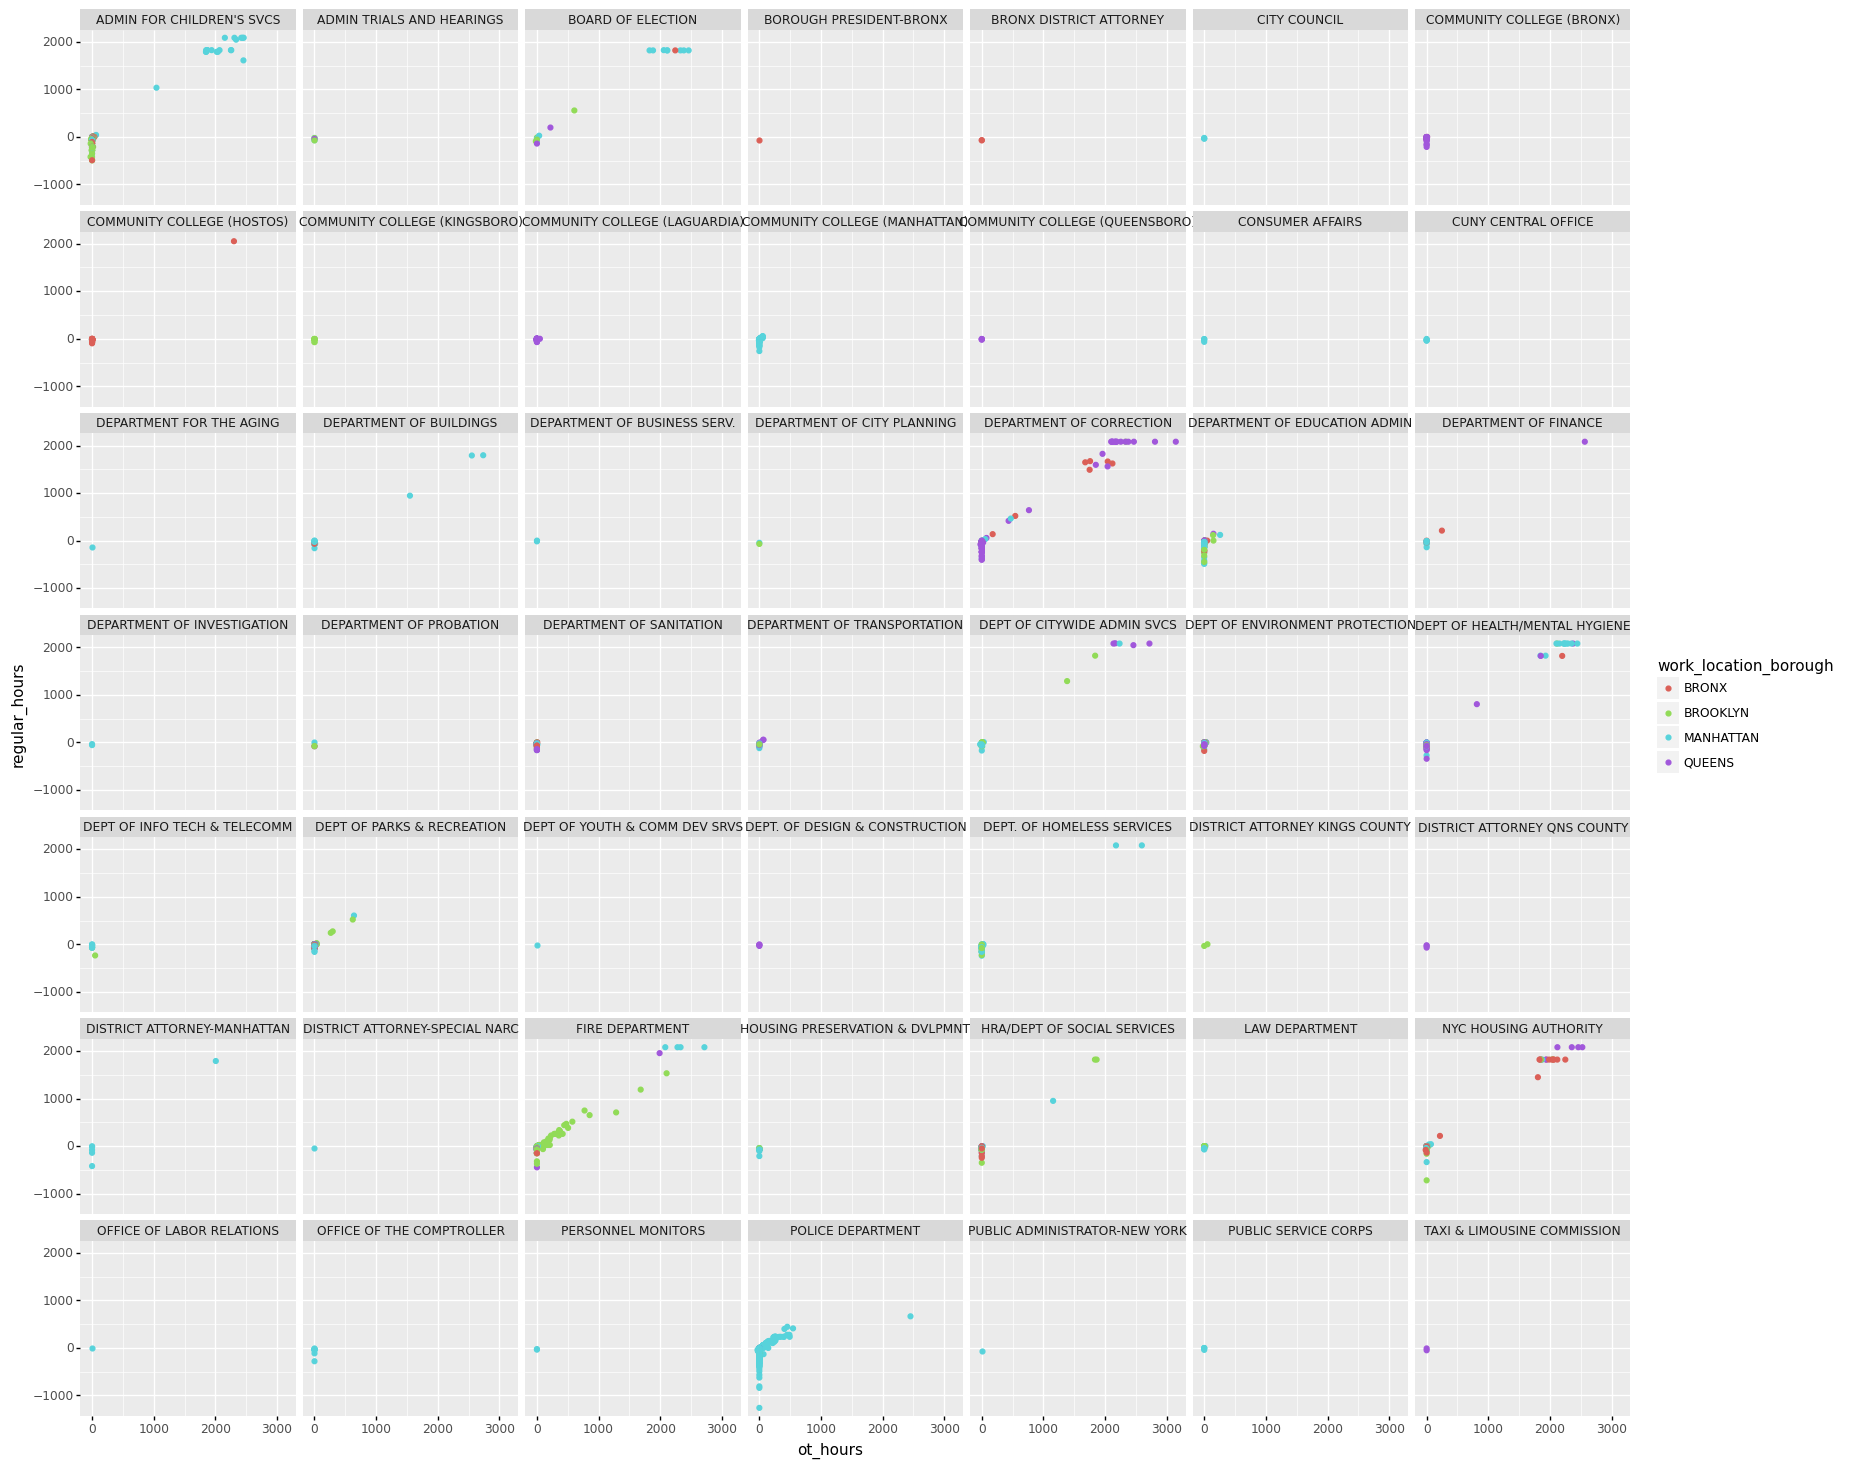

<ggplot: (273634235)>

In [15]:
(
    ggplot(ot_extra,
        aes('ot_hours', 'regular_hours'))
        + geom_point(aes(color='work_location_borough'))
        + facet_wrap('agency_name')
        + theme(figure_size=(20, 18))
)

#### 👉🏻  Soo ... Let's narrow to the top three agencies with the most number of employees who have worked extra in overtime

In [19]:
ot_extra.agency_name.value_counts().head(3)

POLICE DEPARTMENT             432
ADMIN FOR CHILDREN'S SVCS     184
DEPT OF PARKS & RECREATION    150
Name: agency_name, dtype: int64

To plot this further, I'm re-reading the filtered dataset from a new excel — because I couldn't figure out how to do the filtering while plotting.

In [20]:
agencies_df = pd.read_csv('three-agencies.csv')

In [80]:
agencies_df

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2017,NaN,ADMIN FOR CHILDREN'S SVCS,BUCKLEY,TAMOYA,NaN,3/17/08,MANHATTAN,CHILD PROTECTIVE SPECIALIST,CEASED,"54,720.00",per Annum,-63.00,169.85,0.00,0.00,-78.73
1,2017,NaN,ADMIN FOR CHILDREN'S SVCS,FORTE,WYLANDA,NaN,6/23/96,MANHATTAN,CHILD WELFARE SPECIALIST SUPERVISOR,CEASED,"62,947.00",per Annum,-42.25,338.86,0.00,0.00,-192.79
2,2017,NaN,ADMIN FOR CHILDREN'S SVCS,KNOX,HOWARD,NaN,11/28/16,MANHATTAN,PAINTER,ACTIVE,41.79,per Hour,"1,035.03","40,328.74","1,044.50","57,722.59","1,755.18"
3,2017,NaN,ADMIN FOR CHILDREN'S SVCS,OPUOGEN,ANTHONY,O,6/23/96,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ACTIVE,"58,631.00",per Annum,"1,825.00","60,317.51","1,869.75","95,411.40","9,751.05"
4,2017,NaN,ADMIN FOR CHILDREN'S SVCS,UDDIN,MOHAMED,F,10/27/03,MANHATTAN,MOTOR VEHICLE OPERATOR,ACTIVE,"46,476.00",per Annum,"2,085.72","47,816.99","2,459.75","92,255.31","6,848.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,2021,67.00,ADMIN FOR CHILDREN'S SVCS,BELLAMY,JEROME,A,8/6/18,BROOKLYN,YOUTH DEVELOPMENT SPECIALIST,CEASED,"45,759.00",per Annum,-490.00,"-9,213.47",0.00,0.00,"1,308.53"
762,2021,67.00,ADMIN FOR CHILDREN'S SVCS,BENNETT,LANICE,NaN,10/27/14,BROOKLYN,YOUTH DEVELOPMENT SPECIALIST,ON LEAVE,"56,944.00",per Annum,-350.00,"-10,074.17",0.00,0.00,-390.60
763,2021,67.00,ADMIN FOR CHILDREN'S SVCS,HODGES,COREY,A,2/25/19,BROOKLYN,YOUTH DEVELOPMENT SPECIALIST,CEASED,"49,318.00",per Annum,-420.00,"-10,287.97",-24.50,-755.83,-21.87
764,2021,67.00,ADMIN FOR CHILDREN'S SVCS,CARSON,UNKO,L,9/23/19,BRONX,YOUTH DEVELOPMENT SPECIALIST,CEASED,"45,759.00",per Annum,-490.00,"-12,689.88",0.00,0.00,-105.00


In [22]:
agencies_df.query('agency_name =="DEPT OF PARKS & RECREATION"').regular_hours.value_counts()

0.00       38
-8.00      26
-40.00     14
-24.00      7
-16.00      7
-32.00      6
-80.00      4
-70.00      2
-78.50      2
-6.90       1
-21.50      1
-13.68      1
-8.50       1
-24.25      1
-7.08       1
-23.83      1
-12.00      1
-13.00      1
-39.85      1
-31.55      1
-35.00      1
-3.25       1
-51.00      1
-52.65      1
-67.25      1
-71.15      1
-79.00      1
-71.40      1
-85.08      1
-6.88       1
-33.50      1
-0.67       1
-160.00     1
604.87      1
240.93      1
-2.28       1
520.00      1
271.55      1
24.00       1
-55.00      1
6.47        1
-3.75       1
-6.55       1
-7.83       1
-21.80      1
-22.57      1
-23.47      1
-27.73      1
-30.92      1
-7.00       1
-36.98      1
-93.50      1
-140.00     1
Name: regular_hours, dtype: int64

Strangely, a bunch of values for regular hours for Parks and Rec employees are listed as negatives. Focussing on those with at least one regular hour moving forward 

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 16 x 5 in image.
/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: top_three_agencies.svg


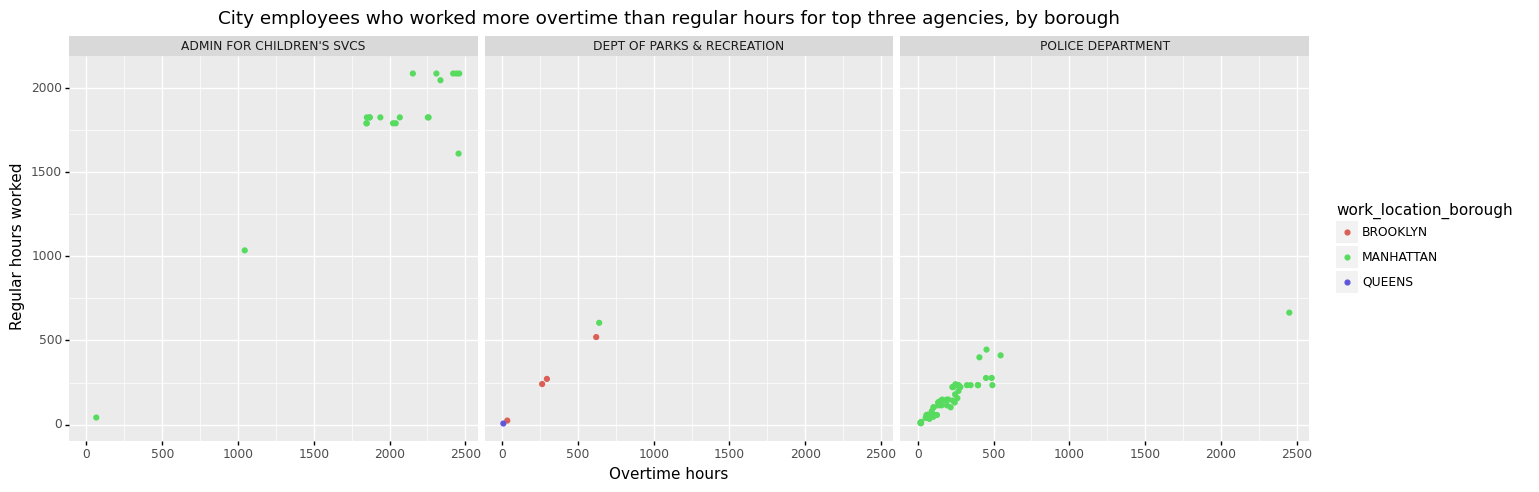

<ggplot: (374434777)>

In [23]:
chart = (
    ggplot(agencies_df.query('regular_hours > 0'),
        aes('ot_hours', 'regular_hours'))
        + geom_point(aes(color='work_location_borough'))
        + facet_wrap('agency_name')
        + theme(figure_size=(16, 5))
        + labs(
            title = "City employees who worked more overtime than regular hours for top three agencies, by borough",
            y = "Regular hours worked",
            x = "Overtime hours"
        )
)
chart.save("top_three_agencies.svg")
chart

#### Combining the plot into one chart

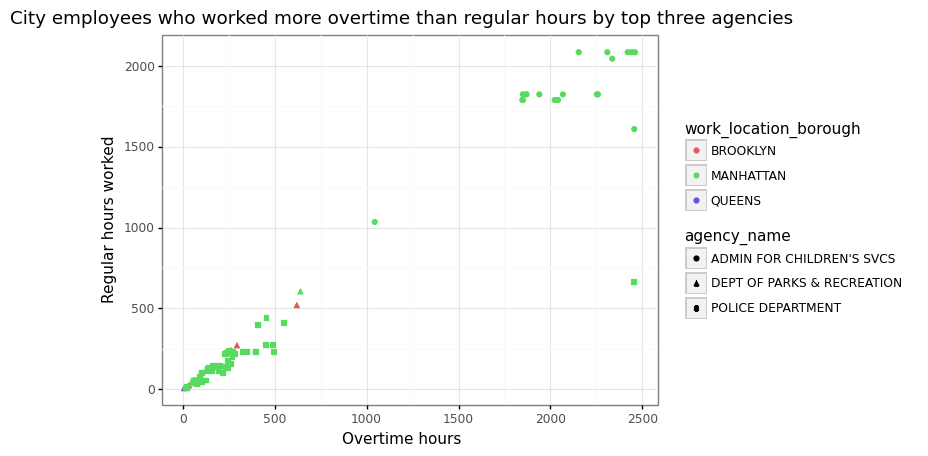

<ggplot: (394095746)>

In [24]:
(
    ggplot(agencies_df.query('regular_hours > 0'),
        aes('ot_hours', 'regular_hours'))
        + geom_point(aes(color='work_location_borough', shape='agency_name'))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "City employees who worked more overtime than regular hours by top three agencies",
            y = "Regular hours worked",
            x = "Overtime hours"
        )
)

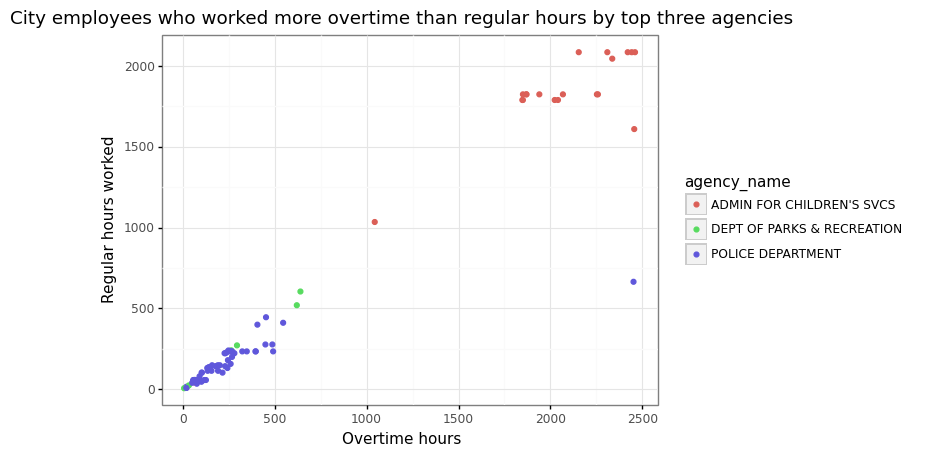

<ggplot: (394175750)>

In [25]:
(
    ggplot(agencies_df.query('regular_hours > 0'),
        aes('ot_hours', 'regular_hours'))
        + geom_point(aes(color='agency_name'))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "City employees who worked more overtime than regular hours by top three agencies",
            y = "Regular hours worked",
            x = "Overtime hours"
        )
)

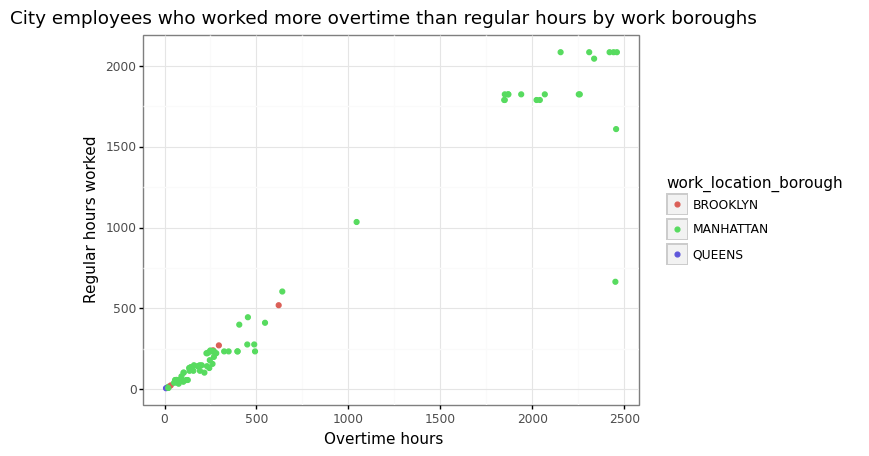

<ggplot: (394077815)>

In [26]:
(
    ggplot(agencies_df.query('regular_hours > 0'),
        aes('ot_hours', 'regular_hours'))
        + geom_point(aes(color='work_location_borough'))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "City employees who worked more overtime than regular hours by work boroughs",
            y = "Regular hours worked",
            x = "Overtime hours"
        )
)

### 📓 Observation

`Most of these employees' work location is Manhattan and fairly similar number of employees for Police Dept and Children's Services. Let's see how much overtime of employees with more overtime than regular hours cost the city, broken down by boroughs`

But first, a quick refresher: 

The new dataframe (agencies_df) has employees who worked more in overtime hours than regular hours, sorted by the top three agencies.

In [40]:
agencies_df.head(10)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2017,NaN,ADMIN FOR CHILDREN'S SVCS,BUCKLEY,TAMOYA,NaN,3/17/08,MANHATTAN,CHILD PROTECTIVE SPECIALIST,CEASED,"54,720.00",per Annum,-63.00,169.85,0.00,0.00,-78.73
1,2017,NaN,ADMIN FOR CHILDREN'S SVCS,FORTE,WYLANDA,NaN,6/23/96,MANHATTAN,CHILD WELFARE SPECIALIST SUPERVISOR,CEASED,"62,947.00",per Annum,-42.25,338.86,0.00,0.00,-192.79
2,2017,NaN,ADMIN FOR CHILDREN'S SVCS,KNOX,HOWARD,NaN,11/28/16,MANHATTAN,PAINTER,ACTIVE,41.79,per Hour,"1,035.03","40,328.74","1,044.50","57,722.59","1,755.18"
3,2017,NaN,ADMIN FOR CHILDREN'S SVCS,OPUOGEN,ANTHONY,O,6/23/96,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ACTIVE,"58,631.00",per Annum,"1,825.00","60,317.51","1,869.75","95,411.40","9,751.05"
4,2017,NaN,ADMIN FOR CHILDREN'S SVCS,UDDIN,MOHAMED,F,10/27/03,MANHATTAN,MOTOR VEHICLE OPERATOR,ACTIVE,"46,476.00",per Annum,"2,085.72","47,816.99","2,459.75","92,255.31","6,848.40"
5,2017,NaN,ADMIN FOR CHILDREN'S SVCS,WATKINS,TYRONE,M,11/5/01,MANHATTAN,CUSTODIAN,ACTIVE,"36,071.00",per Annum,"2,085.72","36,524.32","2,420.00","66,307.25","3,520.25"
6,2017,NaN,ADMIN FOR CHILDREN'S SVCS,WEST,DONNA,M,12/11/06,BRONX,CHILD PROTECTIVE SPECIALIST SUPERVISOR,ON LEAVE,"80,146.00",per Annum,-63.00,309.92,0.00,0.00,283.84
7,2017,NaN,DEPT OF PARKS & RECREATION,SCHNEIDER,GARY,NaN,2/9/10,QUEENS,ADMINISTRATIVE PROJECT MANAGER,CEASED,"60,349.00",per Annum,-13.00,"4,093.93",0.00,0.00,0.00
8,2017,NaN,DEPT OF PARKS & RECREATION,STANISLAW,ALISA,J,12/1/14,QUEENS,ASSISTANT LANDSCAPE ARCHITECT,CEASED,"58,425.00",per Annum,-7.00,"3,024.72",0.00,0.00,17.67
9,2017,NaN,DEPT OF PARKS & RECREATION,WHITFIELD,SHADAYA,M,4/11/16,BROOKLYN,JOB TRAINING PARTICIPANT,CEASED,11.79,per Hour,-16.00,660.24,0.00,0.00,0.00


In [31]:
agencies_df.query('regular_hours > 0').groupby(by='work_location_borough').total_ot_paid.sum()

work_location_borough
BROOKLYN       23,939.48
MANHATTAN   2,615,186.02
QUEENS            177.88
Name: total_ot_paid, dtype: float64

In [39]:
agencies_df.query('regular_hours > 0').groupby(by='work_location_borough').last_name.nunique()

work_location_borough
BROOKLYN      4
MANHATTAN    32
QUEENS        1
Name: last_name, dtype: int64

In [32]:
agencies_df.query('regular_hours > 0').work_location_borough.value_counts()

MANHATTAN    85
BROOKLYN      4
QUEENS        1
Name: work_location_borough, dtype: int64

In [38]:
agencies_df.query('regular_hours > 0').nunique()

fiscal_year                    5
payroll_number                 3
agency_name                    3
last_name                     37
first_name                    32
mid_init                      13
agency_start_date             38
work_location_borough          3
title_description             23
leave_status_as_of_june_30     2
base_salary                   36
pay_basis                      3
regular_hours                 44
regular_gross_paid            70
ot_hours                      90
total_ot_paid                 90
total_other_pay               87
dtype: int64

<AxesSubplot:ylabel='work_location_borough'>

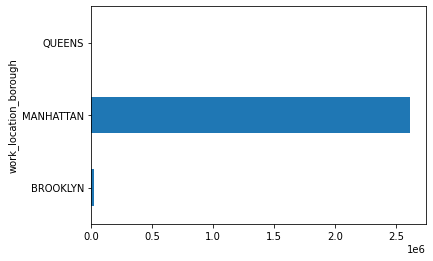

In [34]:
agencies_df.query('regular_hours > 0').groupby(by='work_location_borough').total_ot_paid.sum().plot(kind='barh')

In [36]:
agencies_df.query('regular_hours > 0').query('work_location_borough=="MANHATTAN"').agency_name.value_counts()

POLICE DEPARTMENT             64
ADMIN FOR CHILDREN'S SVCS     20
DEPT OF PARKS & RECREATION     1
Name: agency_name, dtype: int64

In [44]:
# Sanity check -- ignore
agencies_df.fiscal_year.value_counts()

2021    351
2020    268
2019     59
2017     44
2018     44
Name: fiscal_year, dtype: int64

# 32 unique Manhattan employees made over $2.6 million in overtime and they worked more overtime than regular hours.

### 📝 More observations📝

Let's see who among these employees have "ceased" in their leave status — presumably meaning they've retired. Let's take a closer look at that. Also, let's only include employees who have non-negative regular hours.

In [42]:
ceased_df = agencies_df.query('regular_hours > 0').query('leave_status_as_of_june_30 == "CEASED"')
ceased_df

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
25,2017,NaN,POLICE DEPARTMENT,HUNTER-CLARK,TOBIA,M,7/18/96,MANHATTAN,SERGEANTD/A SUPERVISOR DETECTIVE SQUAD,CEASED,"118,902.00",per Annum,102.87,"35,647.26",104.00,"11,448.78","4,849.41"
52,2018,846.00,DEPT OF PARKS & RECREATION,HYLTON,WILLIAM,A,4/7/17,MANHATTAN,JOB TRAINING PARTICIPANT,CEASED,12.14,per Hour,604.87,"8,313.08",640.50,"12,904.96",24.36
53,2018,846.00,DEPT OF PARKS & RECREATION,NESBETH,ANDRE,K,2/1/17,BROOKLYN,JOB TRAINING PARTICIPANT,CEASED,12.14,per Hour,240.93,"3,784.66",264.00,"6,623.96",21.99
103,2019,846.00,DEPT OF PARKS & RECREATION,SMITH,ETTIENNE,Q,1/11/18,BROOKLYN,JOB TRAINING PARTICIPANT,CEASED,13.80,per Hour,271.55,"4,745.94",295.50,"6,839.86",28.08
109,2019,56.00,POLICE DEPARTMENT,GARGAN,MICHAEL,P,2/28/94,MANHATTAN,SERGEANT-,CEASED,"109,360.00",per Annum,148.57,"36,779.78",202.22,"18,547.98","4,335.75"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2021,56.00,POLICE DEPARTMENT,NaN,NaN,NaN,7/1/98,MANHATTAN,POLICE OFFICER,CEASED,"85,292.00",per Annum,57.17,"2,330.52",67.67,"3,087.18","24,055.84"
459,2021,56.00,POLICE DEPARTMENT,NaN,NaN,NaN,3/1/00,MANHATTAN,P.O. DA DET GR3,CEASED,"97,324.00",per Annum,57.17,"2,659.26",87.90,"3,690.05","22,277.38"
460,2021,56.00,POLICE DEPARTMENT,NaN,NaN,NaN,3/1/00,MANHATTAN,P.O. DA DET GR3,CEASED,"97,324.00",per Annum,57.17,"2,659.26",92.18,"4,318.89","21,138.47"
462,2021,56.00,POLICE DEPARTMENT,NaN,NaN,NaN,7/1/03,MANHATTAN,P.O. DA DET GR3,CEASED,"97,324.00",per Annum,57.17,"2,659.26",68.00,"3,791.32","17,892.09"


#### Observation: 70 employees who worked more overtime than regular hours are no longer working. Let's take a closer look!

In [47]:
ceased_df.total_ot_paid.mean().round()

12477.0

`Compare this to average overtime earned across all employees`

In [48]:
df.total_ot_paid.mean().round()

3265.0

# AHHA!

#### 70 employees, worked more overtime than regular, racked up more money, on average, with overtime than all employees combined. And, these 70 employees are no longer working.

`Where did they work and for what agencies?`

In [50]:
ceased_df.work_location_borough.value_counts()

MANHATTAN    66
BROOKLYN      3
QUEENS        1
Name: work_location_borough, dtype: int64

In [51]:
ceased_df.agency_name.value_counts()

POLICE DEPARTMENT             64
DEPT OF PARKS & RECREATION     5
ADMIN FOR CHILDREN'S SVCS      1
Name: agency_name, dtype: int64

`Taking a closer look at Manhattan employees`

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: manhattan.svg


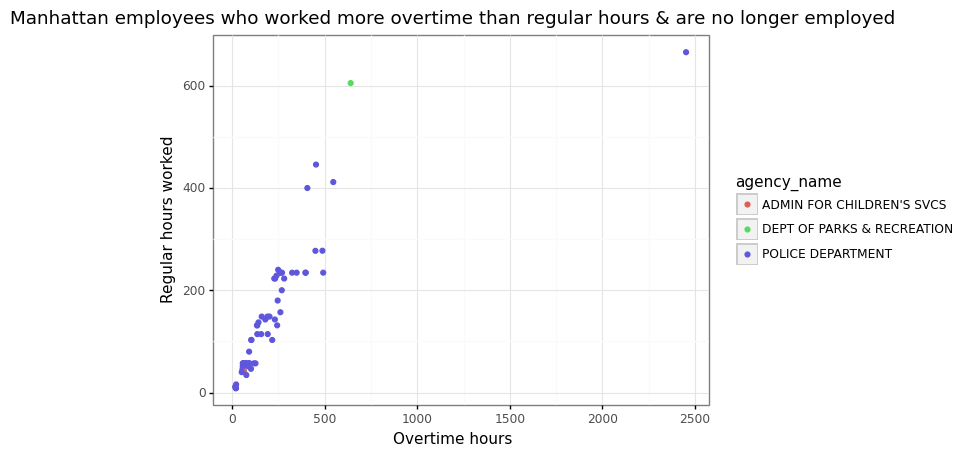

<ggplot: (344076526)>

In [53]:
chart = (
    ggplot(ceased_df.query('work_location_borough == "MANHATTAN"'),
        aes('ot_hours', 'regular_hours'))
        + geom_point(aes(color='agency_name'))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "Manhattan employees who worked more overtime than regular hours & are no longer employed",
            y = "Regular hours worked",
            x = "Overtime hours"
        )
)

chart.save("manhattan.svg")
chart

In [59]:
ceased_df.query('work_location_borough == "MANHATTAN"').sort_values(by="ot_hours", ascending = False).head(3)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
147,2020,56.00,POLICE DEPARTMENT,MURTHA,KEVIN,NaN,4/30/95,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,"141,196.00",per Annum,665.18,"48,008.86","2,451.57","162,000.47","78,132.88"
52,2018,846.00,DEPT OF PARKS & RECREATION,HYLTON,WILLIAM,A,4/7/17,MANHATTAN,JOB TRAINING PARTICIPANT,CEASED,12.14,per Hour,604.87,"8,313.08",640.50,"12,904.96",24.36
422,2021,56.00,POLICE DEPARTMENT,NaN,NaN,NaN,4/15/97,MANHATTAN,LIEUTENANT,CEASED,"131,564.00",per Annum,411.43,"25,942.73",546.50,"40,571.71","6,332.79"


## Taking a step back to see who are the highest paid employees — in overtime — from the entire database

In [68]:
df.sort_values(by='total_ot_paid', ascending = False).head(5)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
2291076,2021,996.00,NYC HOUSING AUTHORITY,PROCIDA,ROBERT,NaN,04/13/1987,BRONX,SUPERVISOR PLUMBER,ACTIVE,387.03,per Day,"1,820.00","100,627.80","2,249.50","248,749.72","7,215.34"
2291070,2021,816.00,DEPT OF HEALTH/MENTAL HYGIENE,MCGROARTY,MICHAEL,NaN,10/06/2014,QUEENS,STATIONARY ENGINEER,ACTIVE,508.80,per Day,"2,080.00","132,288.00","2,374.75","238,829.13","40,105.00"
2291085,2021,996.00,NYC HOUSING AUTHORITY,MARKOWSKI,JAKUB,NaN,05/31/2016,BRONX,PLUMBER,ACTIVE,369.53,per Day,"1,820.00","96,077.80","2,119.50","223,776.86","5,899.29"
2291072,2021,816.00,DEPT OF HEALTH/MENTAL HYGIENE,PETTIT,PATRICK,J,08/02/2010,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,"2,080.00","132,288.00","2,152.75","218,694.96","38,611.82"
2291071,2021,816.00,DEPT OF HEALTH/MENTAL HYGIENE,HALLAHAN,PATRICK,M,02/26/2018,BROOKLYN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,"2,080.00","132,288.00","2,115.25","218,628.18","56,616.07"


/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: overall-high-paid.svg


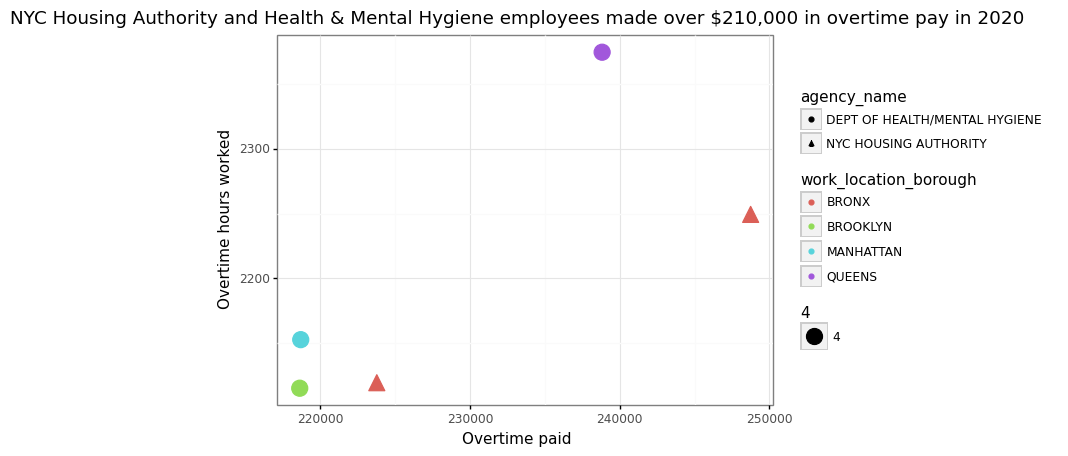

<ggplot: (351371261)>

In [70]:
chart = (
    ggplot(df.sort_values(by='total_ot_paid', ascending = False).head(5),
        aes('total_ot_paid', 'ot_hours'))
        + geom_point(aes(shape='agency_name', color='work_location_borough', size=4))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "NYC Housing Authority and Health & Mental Hygiene employees made over $210,000 in overtime pay in 2020",
            y = "Overtime hours worked",
            x = "Overtime paid"
        )
)

chart.save("overall-high-paid.svg")
chart

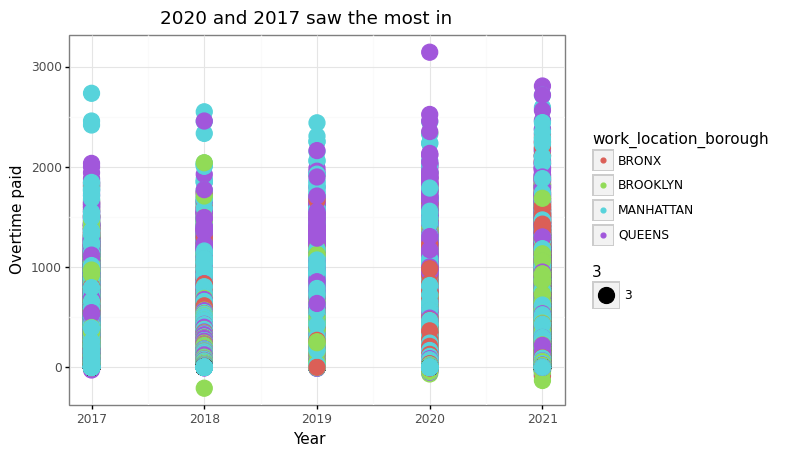

<ggplot: (351889291)>

In [78]:
chart = (
    ggplot(df,
        aes('fiscal_year', 'ot_hours'))
        + geom_point(aes(color='work_location_borough', size=3))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "2020 and 2017 saw the most in ",
            x = "Year",
            y = "Overtime paid"
        )
)

# chart.save("year.svg")
chart

In [79]:
df.sort_values(by='total_ot_paid', ascending = False).fiscal_year.value_counts()

2019    571230
2020    568895
2021    552822
2017    541957
2018    525778
Name: fiscal_year, dtype: int64

## Lots more possibilities, but here's some initial observations /// a quick recap!

1. 1556 city employees, between 2017-2021 worked more in overtime hours than regular hours
2. Of these 1556 employees, 766 were from three agencies: Police, Children's Services and Parks & Rec Departments
3. 70 of these 766 employees no longer work for the city. Together they made nearly \\$12,500 in overtime, on average. This compares to the average being \\$3200 for all employees